In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import os
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/My Drive")

Mounted at /content/drive


In [3]:
input_path = '/content/drive/My Drive/aivcc_cornvolution/data'

In [4]:
gdhy_path = os.path.join(input_path, 'gdhy_v1.2_v1.3_20190128')
crops_path = os.path.join(input_path, 'Production_Crops_E_All_Data')
indices_path = os.path.join(input_path, 'Production_Indices_E_All_Data')
lsprimary_path = os.path.join(input_path, 'Production_LivestockPrimary_E_All_Data')
lsprocessed_path = os.path.join(input_path, 'Production_LivestockProcessed_E_All_Data')
climateuos_path = os.path.join(input_path, 'climate_uos')
ppd_path = os.path.join(input_path, 'Preprocessed')

In [ ]:
historic_data = pd.read_csv(os.path.join(climateuos_path, 'historic_upsampling.csv'))

In [ ]:
historic_data

,lat,lon,time,tas,pr
0,-87.5,-177.5,1971,232.34727,7.115515e-07
1,-87.5,-177.5,1972,231.42746,7.638817e-07
2,-87.5,-177.5,1973,232.77803,8.541263e-07
3,-87.5,-177.5,1974,231.99171,6.186281e-07
4,-87.5,-177.5,1975,232.37180,4.250622e-07
...,...,...,...,...,...
427675,87.5,177.5,1886,257.17154,5.973743e-06
427676,87.5,177.5,1887,257.36370,5.137192e-06
427677,87.5,177.5,1888,258.57797,5.407145e-06
427678,87.5,177.5,1889,258.35483,6.579321e-06


In [ ]:
historic_year_means = historic_data.groupby(by='time').mean().reset_index()
historic_year_means

,time,lat,lon,tas,pr
0,1850,0.0,0.0,277.907040,0.000025
1,1851,0.0,0.0,277.752475,0.000026
2,1852,0.0,0.0,277.924710,0.000026
3,1853,0.0,0.0,277.985439,0.000026
4,1854,0.0,0.0,277.850046,0.000026
...,...,...,...,...,...
160,2010,0.0,0.0,278.780142,0.000025
161,2011,0.0,0.0,278.788634,0.000025
162,2012,0.0,0.0,278.872938,0.000025
163,2013,0.0,0.0,278.910025,0.000026


<Figure size 432x288 with 0 Axes>

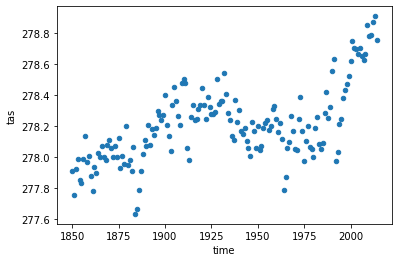

<Figure size 432x288 with 0 Axes>

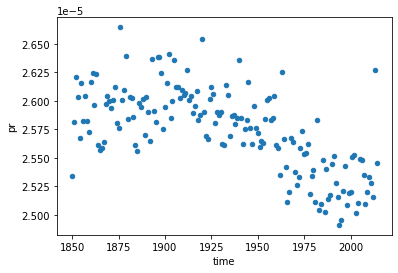

In [ ]:
plt.figure()
historic_year_means.plot.scatter(x='time', y='tas')
plt.show()
plt.figure()
historic_year_means.plot.scatter(x='time', y='pr')
plt.show()

In [ ]:
def get_world_map_as_array(df, year, attribute, resample_factor=None):
  world_map = gdhy_df.loc[:,:, pd.Period(year)][attribute]
  world_array = world_map.fillna(0).to_numpy().reshape((360, 720))

  if resample_factor is not None:
    world_array = zoom(world_array, resample_factor, order=1)

  return world_array

In [ ]:
historic_data

,lat,lon,time,tas,pr
0,-87.5,-177.5,1971,232.34727,7.115515e-07
1,-87.5,-177.5,1972,231.42746,7.638817e-07
2,-87.5,-177.5,1973,232.77803,8.541263e-07
3,-87.5,-177.5,1974,231.99171,6.186281e-07
4,-87.5,-177.5,1975,232.37180,4.250622e-07
...,...,...,...,...,...
427675,87.5,177.5,1886,257.17154,5.973743e-06
427676,87.5,177.5,1887,257.36370,5.137192e-06
427677,87.5,177.5,1888,258.57797,5.407145e-06
427678,87.5,177.5,1889,258.35483,6.579321e-06


In [ ]:
historic_data.sort_index(inplace=True)

In [ ]:
historic_data.loc[:, :, pd.Period(1994)]

IndexingError: ignored

In [5]:
df = pd.read_pickle(os.path.join(ppd_path, 'merged_data.pkl'))

In [6]:
df

tas            pr  ...  wheat_spring  wheat_winter
lat    lon    time                            ...                            
-89.75 0.25   1850  238.431683  1.464376e-06  ...           NaN           NaN
              1850  235.692422  6.478361e-07  ...           NaN           NaN
              1850  236.768497  1.727913e-06  ...           NaN           NaN
              1850  236.650588  1.777953e-06  ...           NaN           NaN
              1850  236.746587  9.806389e-07  ...           NaN           NaN
...                        ...           ...  ...           ...           ...
 89.75 357.75 2016         NaN           NaN  ...           NaN           NaN
       358.25 2016         NaN           NaN  ...           NaN           NaN
       358.75 2016         NaN           NaN  ...           NaN           NaN
       359.25 2016         NaN           NaN  ...           NaN           NaN
       359.75 2016         NaN           NaN  ...           NaN           NaN

[51921165 rows x 12 columns]

In [7]:
df.dropna(axis='rows')

,,,tas,pr,maize,maize_major,maize_second,rice,rice_major,rice_second,soybean,wheat,wheat_spring,wheat_winter
lat,lon,time,,,,,,,,,,,,
